In [ ]:
%matplotlib inline


# Assignment: Label Propagation

Comparison for decision boundary generated on dataset
between Label Propagation and another model, e.g. SVM.


The assignment will require following code from this tutorial: https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_semi_supervised_versus_svm_iris.html#sphx-glr-auto-examples-semi-supervised-plot-semi-supervised-versus-svm-iris-py


First, study the code linked at the above tutorial. It shows the performance of Label Propagation in finding the boundaries between the classes in the IRIS dataset. And compares the performance against SVM. 

##Question 1 (2points): ##
We will instead work on the WINE dataset. It is one of the standard datasets available in sklearn.
Add code below to load the wine dataset and print its description.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import LabelSpreading



rng = np.random.RandomState(0)

#YOUR CODE GOES HERE
#SAMPLE OUTPUT SHOWN BELOW

data=datasets.load_wine()

data

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

#Question 2 (2 points)#

Set the X and y from the loaded dataset. 
X should be the first two columns of the dataset and y should be the pre-determined target variable in the wine data. 

In [ ]:
X=data.data[:,:2]
y=data.target
#YOUR CODE GOES HERE
#SAMPLE OUTPUT SHOWN BELOW
X

array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.

#Question 3 (6 points)# 

Similar to the code in the tutorial linked above, create three versions of the label propagation algorithm. 
However, your label propagation should start with **10%, 30% and 50%** of the data labeled.

Similar to the code in tutorial linked above, compare the performance of the label propagation algorithms to an SVM classifier with RBF kernel. 

You should output four plots as shown in sample output below.

In [ ]:
!pip install --upgrade scikit-learn



     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/semi_supervised/_self_training.py:187: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


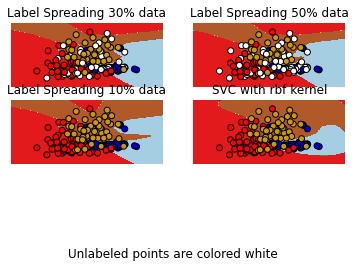

In [ ]:
#YOUR CODE GOES HERE
#SAMPLE OUTPUT SHOWN BELOW
# step size in the mesh
h = .02

rng = np.random.RandomState(0)
y_rand = rng.rand(y.shape[0])
y_10=np.copy(y)
y_30[y_rand < 0.1] = -1 
y_30 = np.copy(y)
y_30[y_rand < 0.3] = -1  # set random samples to be unlabeled
y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30), y_30, 'Label Spreading 30% data')
ls50 = (LabelSpreading().fit(X, y_50), y_50, 'Label Spreading 50% data')
ls10 = (LabelSpreading().fit(X, y_10), y_10, 'Label Spreading 10% data')

# the base classifier for self-training is identical to the SVC
base_classifier = SVC(kernel='rbf', gamma=.5, probability=True)
st30 = (SelfTrainingClassifier(base_classifier).fit(X, y_30),
        y_30, 'Self-training 30% data')
st50 = (SelfTrainingClassifier(base_classifier).fit(X, y_50),
        y_50, 'Self-training 50% data')
st10 = (SelfTrainingClassifier(base_classifier).fit(X, y_10),
        y_30, 'Self-training 10% data')

rbf_svc = (SVC(kernel='rbf', gamma=.5).fit(X, y), y, 'SVC with rbf kernel')

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

classifiers = (ls30, ls50, ls10, rbf_svc)
for i, (clf, y_train, title) in enumerate(classifiers):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

##Question 4 (5 points):##

What can you observe in terms of performance for the 4 algorithms above? Which label propagation works better? Does more labeled data help with the final performance?

Write at least **50 words**. 

#YOUR RESPONSE GOES HERE#
This algorithm make use of both labeled and unlabeled dataset. We see that algorithms learns good boundaries when more unlabled data are there in the dataset. Seems like 10% data is performing better. Yes, more labeled data helps in the final performance. 